/Users/xiayunsun/code/venvs/py367/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


(210, 160, 3)
0.78125
(210, 160)
(128, 128)


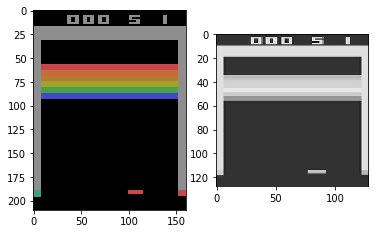

In [38]:
# visualise DQN preprocess
import gym
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.ndimage

env = gym.make('BreakoutNoFrameskip-v4')
env.reset()
# accumulate 5 frames
frames = []
for i in range(5):
    frame, reward, is_done, info = env.step(env.action_space.sample())
    frames.append(frame)
print(frames[0].shape)

plt.figure(1)
plt.subplot(121)
plt.imshow(frames[0])
plt.subplot(122)

frame = np.maximum(frames[0], frames[1])
frame = np.divide(frame, 256)
print(np.amax(frame))
# greyscale
frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
print(frame.shape)
# rescale
frame = scipy.ndimage.interpolation.zoom(frame, zoom = np.divide(128, frame.shape))
print(frame.shape)

plt.imshow(frame, cmap = plt.get_cmap('gray'))
plt.show()

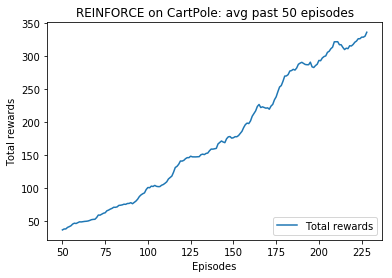

In [12]:
# plot REINFORCE performance
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

rewards = []

with open('logs/reinforce_cartpole.csv', 'r') as f:
    for line in f.readlines():
        t = line.split(',')
        rewards.append(int(t[1].rstrip()))

# moving average over 50 episodes
ret = np.cumsum(rewards)
n = 50
ret[n:] = ret[n:] - ret[:-n]
rewards = ret[n - 1:] / n

fig, ax = plt.subplots()

ax.plot([e+50 for e in range(len(rewards))],rewards, label='Total rewards')
ax.set_xlabel('Episodes')
ax.set_ylabel('Total rewards')
ax.set_title('REINFORCE on CartPole: avg past 50 episodes')
ax.legend(loc=4)
plt.show()